# Assignment

- Create and copy this file in folder `BME11`, name your new file's name as your group number (ex: group1.ipynb)
- Visualize data from `datasets/2019_nCoV_data.csv`

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus.

The data is available from 22 Jan 2020.

source: [kaggle](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset)

## 0. Group Members

Firstname Lastname (Nickname) Student id.
Jennifer Innes-Taylor EGBI 6113073
Atirut Boribalburephan EGBI 6113097
Kanokpol Pao-in EGBI 6113328

## 1. Read coronavirus data from `2019_nCoV_data.csv`

In [3]:
from os import path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
import seaborn as sns
color = sns.color_palette()
sns.set()

In [4]:
def dp(dataFileName):
    '''
    This function is used to get full data path (dp) from data file name.
    '''
    return path.join('datasets', dataFileName)

In [5]:
filename='2019_nCoV_data.csv'

## 2. Show dataframe

In [7]:
df= pd.read_csv(dp(filename))
df

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
5,6,01/22/2020 12:00:00,Guangdong,China,01/22/2020 12:00:00,26.0,0.0,0.0
6,7,01/22/2020 12:00:00,Guangxi,China,01/22/2020 12:00:00,2.0,0.0,0.0
7,8,01/22/2020 12:00:00,Guizhou,China,01/22/2020 12:00:00,1.0,0.0,0.0
8,9,01/22/2020 12:00:00,Hainan,China,01/22/2020 12:00:00,4.0,0.0,0.0
9,10,01/22/2020 12:00:00,Hebei,China,01/22/2020 12:00:00,1.0,0.0,0.0


## 3. Show which countries affected by the virus and how many cases have been reported

In [79]:
Country = df.groupby(['Country']).max()
Country = Country.sort_values(by=['Confirmed'],ascending=False)

Country

,Date,Last Update,Confirmed,Deaths,Recovered
Country,,,,,
Mainland China,02/04/2020 22:00:00,2020-05-02 02:53:00,16678.0,479.0,522.0
China,01/22/2020 12:00:00,01/22/2020 12:00:00,444.0,0.0,0.0
Thailand,02/04/2020 22:00:00,2020-04-02 15:33:00,25.0,0.0,7.0
Singapore,02/04/2020 22:00:00,2020-04-02 15:33:00,24.0,0.0,0.0
Japan,02/04/2020 22:00:00,2020-04-02 16:43:00,22.0,0.0,1.0
Hong Kong,02/04/2020 22:00:00,2020-05-02 02:33:00,18.0,1.0,0.0
South Korea,02/04/2020 22:00:00,2020-04-02 15:33:00,16.0,0.0,0.0
Germany,02/04/2020 22:00:00,2020-03-02 20:53:00,12.0,0.0,0.0
Taiwan,02/04/2020 22:00:00,2020-04-02 14:53:00,11.0,0.0,0.0


## 4. Show and visualize total number of confirmed, deaths & recovered cases in each countries and sort it by amount of confirmed cases

Text(0.5,1,'CoVid2019')

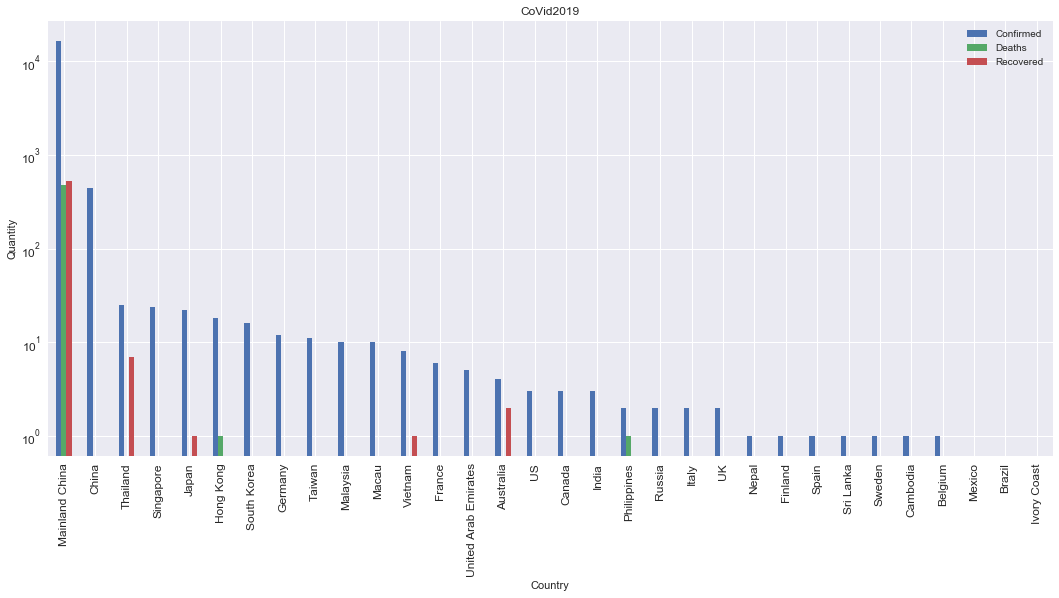

In [83]:
y=df['Confirmed']
x=df['Country']
Country = df.groupby(['Country']).max()
Country = Country.sort_values(by=['Confirmed'],ascending=False)
pt = Country.plot(kind='bar', figsize=(18,8), fontsize=12,logy=True)
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('CoVid2019')


## 5. Show and visualize global spread of the coronavirus cases over time 

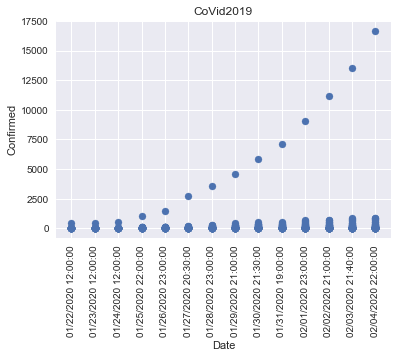

In [52]:
x=df['Date']
y=df['Confirmed']
plt.xlabel('Date')
plt.ylabel('Confirmed')
plt.xticks(rotation=90)
plt.title('CoVid2019')
plt.scatter(x,y)
plt.show()

## 6. Show relation between confirmed cases and deaths case in linear regression

Text(0.5,1,'Linear Relationship')

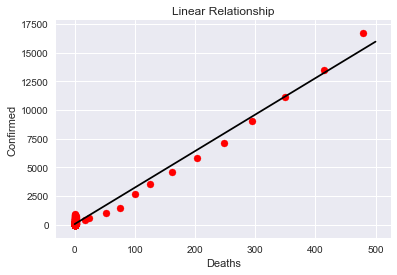

In [71]:
x = df['Deaths']
y = df['Confirmed']
p = np.poly1d(np.polyfit(x,y,1))

xp = np.linspace(0, 500, 100)
plt.plot(xp,p(xp),c = 'black')
plt.scatter(x,y,c = 'r')
plt.xlabel('Deaths')
plt.ylabel('Confirmed')
plt.title('Linear Relationship')



## 7. Show dependence between confirmed cases and recovered case in linear regression

Text(0.5,1,'Linear Relationship')

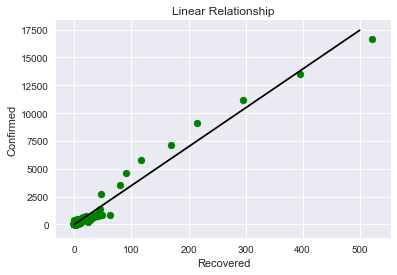

In [73]:
x = df['Recovered']
y = df['Confirmed']
p = np.poly1d(np.polyfit(x,y,1))

xp = np.linspace(0, 500, 100)
plt.plot(xp,p(xp),c = 'black')
plt.scatter(x,y,c = 'g')
plt.xlabel('Recovered')
plt.ylabel('Confirmed')
plt.title('Linear Relationship')